# Random Forest 
## Machine learning algorithm to predict which patients are prone to brain hemorrhage based on medical diagostic data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Amit/data.csv')

## Dropping nulls
Checked the prediction with mean imputation as well; accuracy was almost same

In [4]:
df = df.dropna()

## Random forest cant handle categorical

In [5]:
eatingMapping = {'Bad':0,'Poor':1,'Normal':2,'Good':3,'Excellent':4}

In [6]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['EatingHabit'] = df['EatingHabit'].map(eatingMapping)
df['BrainHemorrhage'] = number.fit_transform(df['BrainHemorrhage'].astype('str'))
df['BrainTumorPresent'] = number.fit_transform(df['BrainTumorPresent'].astype('str'))

## 80, 20 split between training test data

In [7]:
# 80% - train set, 20% - test set
dfTrain, dfTest = np.split(df.sample(frac=1), [int(.8*len(df)),])

In [8]:
xTrain = dfTrain[['BloodPressure','CholesterolLevel','EatingHabit','BrainBloodVesselStrength','BrainTumorPresent']]
yTrain = dfTrain[['BrainHemorrhage']]
xTest = dfTest[['BloodPressure','CholesterolLevel','EatingHabit','BrainBloodVesselStrength','BrainTumorPresent']]
yTest = dfTest[['BrainHemorrhage']]

In [9]:
# Checked the prediction with mean imputation as well; accuracy was almost same
# Random forest cant handle missing values
# xTrainRF = xTrain.apply(lambda x: x.fillna(x.mean()),axis=0)

## Model training

In [15]:
# increasing n_estimators upto 20 (best)
# min_samples_leaf=1 gives best 
from sklearn.ensemble import RandomForestClassifier
modelRandomForest = RandomForestClassifier(max_features= xTrain.columns.size, n_jobs= 4,min_samples_leaf=1, n_estimators=20,
                                           oob_score = True, random_state = 42)
modelRandomForest.fit(xTrain,yTrain)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=4, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

## Confusion matrix

In [16]:
pd.crosstab(dfTrain['BrainHemorrhage'], modelRandomForest.predict(xTrain), rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,328438,47403
1,48050,328413


In [ ]:
# Accuracy: 87% Train

## Model testing

In [17]:
pd.crosstab(dfTest['BrainHemorrhage'], modelRandomForest.predict(xTest), rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,47542,46197
1,47933,46405


## Important contributing features in decreasing order of their weights

In [18]:
names = xTrain.columns
print sorted(zip(map(lambda x: round(x, 4), modelRandomForest.feature_importances_), names), 
             reverse=True)

[(0.3269, 'CholesterolLevel'), (0.3239, 'BloodPressure'), (0.1678, 'BrainBloodVesselStrength'), (0.1269, 'EatingHabit'), (0.0545, 'BrainTumorPresent')]


## Plot the feature importances of the forest

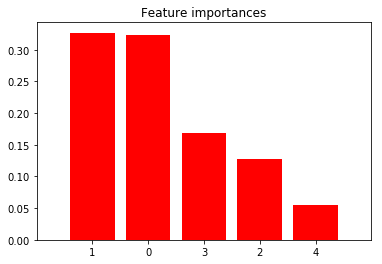

In [19]:
import matplotlib.pyplot as plt
importances = modelRandomForest.feature_importances_
std = np.std([modelRandomForest.feature_importances_ for tree in modelRandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(xTrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(xTrain.shape[1]), indices)
plt.xlim([-1, xTrain.shape[1]])
plt.show()